### Programming Assignment 2 Q2
### Supervised Learning

Group Number : 46

Student 1 : Aryan Singh 19CS30007

Student 2 : Seemant Guruprasad Achari 19CS30057


In [176]:
# importing various tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

from sklearn import svm
from sklearn.neural_network import MLPClassifier


In [118]:
# Column 1 is defined as the class label
LABEL = 1 

# To make outputs reproducible
np.random.seed(101)

In [119]:
# loading the dataset

df = pd.read_csv('lung-cancer.data', header = None, na_values=["?"])
df.columns += 1

In [120]:
print(df.head())

print("Dataset loaded successfully!")

   1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0   1   0   3   0  NaN   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1   1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2   1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3   1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4   1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   

   55  56  57  
0   1   2   2  
1   1   2   2  
2   2   1   2  
3   2   2   2  
4   1   2   2  

[5 rows x 57 columns]
Dataset loaded successfully!


In [121]:
for attr,value in df.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")

Attribute 5 has 4 missing data.
Attribute 39 has 1 missing data.


In [122]:
# Filling the na values with mode of the columns
fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
df_without_na = df.apply(fill_mode, axis=0)

In [123]:
for attr,value in df_without_na.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")
print("Missing data handled using mode!")

Missing data handled using mode!


In [124]:
print(df_without_na.head())

   1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0   1   0   3   0  1.0   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1   1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2   1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3   1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4   1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   

   55  56  57  
0   1   2   2  
1   1   2   2  
2   2   1   2  
3   2   2   2  
4   1   2   2  

[5 rows x 57 columns]


In [125]:
# splitting dataset index maintaing the ratio of true and false examples
def train_test_split(df,train_sample=0.5,target_col= LABEL):
    all_indexes=[]
    df_grouped= df.groupby(target_col)
    for x,x_df in df_grouped:
        t = x_df.sample(frac=train_sample,).index
        all_indexes.append(t)
    g = all_indexes[0].values
    for k in all_indexes[1:]:
        g=np.hstack([g,k.values])
        #np.hstack([all_indexes[0].values,all_indexes[1].values])

    train_df = df[df.index.isin(g) ]
    test_df = df[~df.index.isin(g)]
    return train_df, test_df 

In [126]:
df_without_na[LABEL].value_counts(True)

2    0.40625
3    0.31250
1    0.28125
Name: 1, dtype: float64

In [127]:
train_df, test_df = train_test_split(df_without_na,0.8)

In [128]:
train_df[LABEL].value_counts()

2    10
3     8
1     7
Name: 1, dtype: int64

In [129]:
print(f"The shape of training dataset {train_df.shape}")
print(f"The shape of testing dataset {test_df.shape}")

The shape of training dataset (25, 57)
The shape of testing dataset (7, 57)


In [130]:
train_stats = train_df.describe()
train_stats.pop(LABEL)
train_stats = train_stats.transpose()
print(train_stats)


    count  mean       std  min  25%  50%  75%  max
2    25.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0
3    25.0  2.32  0.556776  1.0  2.0  2.0  3.0  3.0
4    25.0  2.24  0.830662  0.0  2.0  2.0  3.0  3.0
5    25.0  1.36  0.568624  0.0  1.0  1.0  2.0  2.0
6    25.0  0.28  0.458258  0.0  0.0  0.0  1.0  1.0
7    25.0  2.24  0.723418  1.0  2.0  2.0  3.0  3.0
8    25.0  2.12  0.781025  1.0  2.0  2.0  3.0  3.0
9    25.0  2.44  0.768115  1.0  2.0  3.0  3.0  3.0
10   25.0  1.20  0.577350  1.0  1.0  1.0  1.0  3.0
11   25.0  1.44  0.583095  1.0  1.0  1.0  2.0  3.0
12   25.0  1.60  0.707107  1.0  1.0  1.0  2.0  3.0
13   25.0  0.88  0.832666  0.0  0.0  1.0  1.0  3.0
14   25.0  1.88  0.832666  1.0  1.0  2.0  3.0  3.0
15   25.0  2.20  0.763763  1.0  2.0  2.0  3.0  3.0
16   25.0  2.24  0.778888  1.0  2.0  2.0  3.0  3.0
17   25.0  1.40  0.577350  1.0  1.0  1.0  2.0  3.0
18   25.0  1.84  0.374166  1.0  2.0  2.0  2.0  2.0
19   25.0  1.88  0.331662  1.0  2.0  2.0  2.0  2.0
20   25.0  0.52  0.871780  0.0 

In [131]:
attr_to_drop = []
for row, val in train_stats["std"].items():
    if val == 0:
        print(f"Attribute {row} has 0 std in the training set, hence droping it.")
        attr_to_drop.append(row)
train_stats_upd = train_stats.drop(attr_to_drop)
train_df_upd = train_df.drop(attr_to_drop, axis = 1)
test_df_upd = test_df.drop(attr_to_drop, axis = 1)
        

Attribute 2 has 0 std in the training set, hence droping it.


In [132]:
train_labels = train_df_upd.pop(LABEL)
test_labels = test_df_upd.pop(LABEL)

### Data Normalization

In [166]:
def standard_scalar_normalization(df, df_stats):
    # print(df.shape)
    norm_df = (df - df_stats["mean"])/df_stats["std"]
    np.nan_to_num(norm_df, False, 0.0)
    return norm_df

In [134]:
norm_train = standard_scalar_normalization(train_df_upd, train_stats_upd)
norm_test = standard_scalar_normalization(test_df_upd, train_stats_upd)

(25, 55)
(7, 55)


In [135]:
print("Normalization complete")

Normalization complete


In [136]:
#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='linear', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(norm_train, train_labels)

#Predict the response for test dataset
y_pred = model.predict(norm_test)

In [137]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))


Accuracy: 0.5714285714285714


In [138]:
def GetAccuracy(trueLabel, pred, printDetails = True):
    total_samples = len(trueLabel)
    cnt = (trueLabel == pred).sum()
    accuracy = cnt / total_samples
    if(printDetails):
        print(f"Accuracy  = {cnt / total_samples}")
    
    return accuracy

In [139]:
model_map = {}
accuracy_map = {}

In [140]:
kernel_types = ['linear', 'poly', 'rbf']

for kernel_type in kernel_types:

    #Create a linear kernel svm Classifier
    model = svm.SVC(C = 1, 
                    kernel=kernel_type, 
                    degree = 2 # will be ignored by all kernel except poly
                    # Thus poly will become quadratic
                ) # Linear Kernel

    #Train the model using the training sets
    model.fit(norm_train, train_labels)


    y_pred = model.predict(norm_train)
    acc = GetAccuracy(train_labels, y_pred, False)
    print(f"Training Accuracy for SVM with {kernel_type} kernel = {acc}")

    #Predict the response for test dataset
    y_pred = model.predict(norm_test)
    acc = GetAccuracy(test_labels, y_pred, False)
    print(f"Testing Accuracy for SVM with {kernel_type}  kernel = {acc}")


    model_map[kernel_type] = model
    accuracy_map[kernel_type] = acc

Training Accuracy for SVM with linear kernel = 1.0
Testing Accuracy for SVM with linear  kernel = 0.5714285714285714
Training Accuracy for SVM with poly kernel = 0.88
Testing Accuracy for SVM with poly  kernel = 0.42857142857142855
Training Accuracy for SVM with rbf kernel = 0.96
Testing Accuracy for SVM with rbf  kernel = 0.42857142857142855


In [149]:
mlp_model_map= {}
mlp_model_accuracy = {}
mlp_models_sizes = {
    'Single Hidden Layer' : (16,),
    'Multi Hidden Layer' : (256, 16)
}

In [151]:
for name, layerSize in mlp_models_sizes.items():
    mlp = MLPClassifier(learning_rate_init = 0.001, batch_size=32, hidden_layer_sizes=layerSize, solver='sgd')
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    print(f"Testing Accuracy for MLP with {name}  = {acc}")
    mlp_model_map[name] = mlp
    mlp_model_accuracy[name] = acc

e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP with Single Hidden Layer  = 0.2857142857142857
Testing Accuracy for MLP with Multi Hidden Layer  = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [143]:
mlp = MLPClassifier(learning_rate_init = 0.001, batch_size=32, hidden_layer_sizes=(16,), solver='sgd')
mlp

MLPClassifier(batch_size=32, hidden_layer_sizes=(16,), solver='sgd')

In [144]:
mlp.fit(norm_train, train_labels)

e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=32, hidden_layer_sizes=(16,), solver='sgd')

In [145]:
pred = mlp.predict(norm_test)

In [148]:
GetAccuracy(test_labels, pred)

Accuracy  = 0.42857142857142855


0.42857142857142855

In [156]:


bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
LayerSize = mlp_models_sizes[bestSetting]
y_data = []
x_data = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for l_rate in x_data:
    mlp = MLPClassifier(learning_rate_init = l_rate, batch_size=32, hidden_layer_sizes=layerSize, solver='sgd')
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    print(f"Testing Accuracy for MLP with {name}  = {acc}")
    y_data.append(acc)

e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP with Multi Hidden Layer  = 0.5714285714285714
Testing Accuracy for MLP with Multi Hidden Layer  = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP with Multi Hidden Layer  = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP with Multi Hidden Layer  = 0.5714285714285714
Testing Accuracy for MLP with Multi Hidden Layer  = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


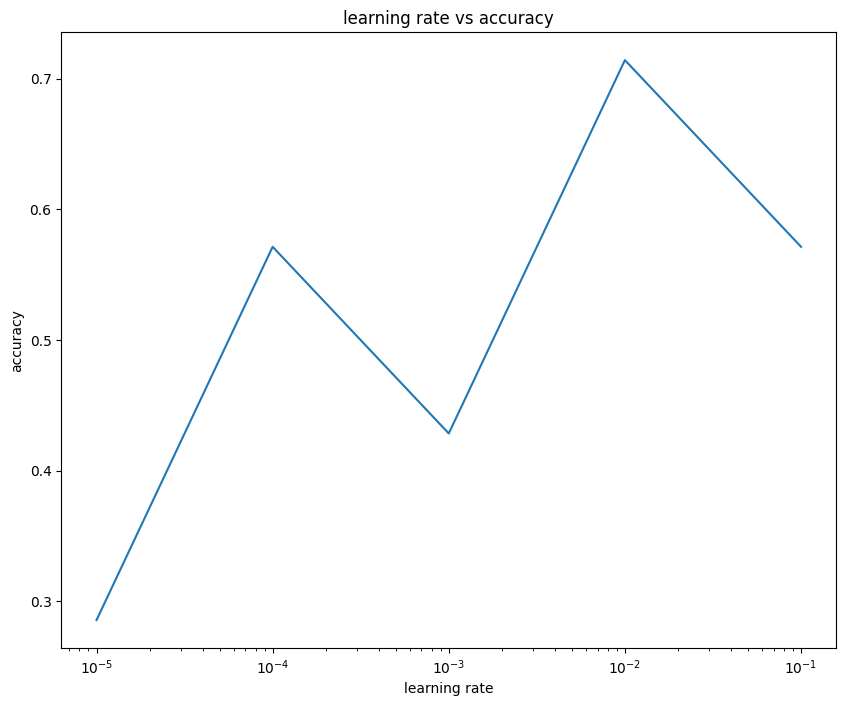

In [158]:
plt.figure(figsize = (10,8))
plt.plot(x_data, y_data)
plt.title("learning rate vs accuracy")
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.xscale("log")
plt.show()

In [167]:
def modelEvaluation(model, df):
    fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
    df_without_na = df.apply(fill_mode, axis=0)
    train_df, test_df = train_test_split(df_without_na,0.8)
    train_stats = train_df.describe()
    train_stats.pop(LABEL)
    train_stats = train_stats.transpose()
    attr_to_drop = []
    for row, val in train_stats["std"].items():
        if val == 0:
            print(f"Attribute {row} has 0 std in the training set, hence droping it.")
            attr_to_drop.append(row)
            return 0.0 # since it has a useless attribute
    train_stats_upd = train_stats.drop(attr_to_drop)
    train_df_upd = train_df.drop(attr_to_drop, axis = 1)
    test_df_upd = test_df.drop(attr_to_drop, axis = 1)
    # print(train_df_upd.shape)
    train_labels = train_df_upd.pop(LABEL)
    test_labels = test_df_upd.pop(LABEL)
    norm_train = standard_scalar_normalization(train_df_upd, train_stats_upd)
    norm_test = standard_scalar_normalization(test_df_upd, train_stats_upd)

    mlp = model
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    print(f"Testing Accuracy for MLP = {acc}")
    return acc

    
def sfs(model, pd_data):
    '''
    # takes data frame and model as input
    # and then returns the dataframe with the optimal attributes
    '''
    # Record the name of the column that contains the instance IDs and the class
    no_of_columns = len(pd_data.columns) # number of columns
    class_column_index = 0
    class_column_colname = pd_data.columns[class_column_index]
 
    # Record the number of available attributes
    no_of_available_attributes = no_of_columns - 1
 
    # Create a dataframe containing the available attributes by removing
    # the Instance and the Class Column
    available_attributes_df = pd_data.drop(columns = [class_column_colname]) 
 
    # Create an empty optimal attribute dataframe containing only the
    # Instance and the Class Columns
    optimal_attributes_df = pd_data[[class_column_colname]]
 
    # Set the base performance to a really low number
    base_performance = -9999.0
 
    # Check whether adding a new attribute to the optimal attributes dataframe
    # improves performance
    # While there are still available attributes left
    while no_of_available_attributes > 0: 
        # Set the best performance to a low number
        best_performance = -9999.0
 
        # Initialize the best attribute variable to a placeholder
        best_attribute = "Placeholder"
 
        # For all attributes in the available attribute data frame
        for col in range(0, len(available_attributes_df.columns)):
 
            # Record the name of this attribute
            this_attr = available_attributes_df.columns[col]
         
            # Create a new dataframe with this attribute inserted
            temp_opt_attr_df = optimal_attributes_df.copy()
            temp_opt_attr_df.insert(loc=1,column=this_attr,value=(available_attributes_df[this_attr]))
 
            # Run Naive Bayes on this new dataframe and return the 
            # classification accuracy
            current_performance = modelEvaluation(model, temp_opt_attr_df)
 
            # Find the new attribute that yielded the greatest
            # classification accuracy
            if current_performance > best_performance:
                best_performance = current_performance
                best_attribute = this_attr
 
        # Did adding another feature lead to improvement?
        if best_performance > base_performance:
            base_performance = best_performance
 
            # Add the best attribute to the optimal attribute data frame
            optimal_attributes_df.insert(
                loc=1,column=best_attribute,value=(
                available_attributes_df[best_attribute]))
 
            # Remove the best attribute from the available attribute data frame
            available_attributes_df = available_attributes_df.drop(
                columns = [best_attribute]) 
 
            # Print the best attribute to the console
            print()
            print(str(best_attribute) + " added to the optimal attribute subset")
            print()
            
            # Decrement the number of available attributes by 1
            no_of_available_attributes -= 1
 
            # Print number of attributes remaining to the console
            print()
            print(str(no_of_available_attributes) + " attributes remaining")
            print()
            print()
        else:
            print()
            print("Performance did not improve this round.")
            print("End of Stepwise Forward Selection.")
            print()
            break
 
    # Return the optimal attribute set
    return optimal_attributes_df

In [168]:
bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
bestModel = mlp_model_map[bestSetting]

opt_df = sfs(bestModel, df)

e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e

Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.14285714285714285
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.14285714285714285


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.2857142857142857
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.14285714285714285


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855

38 added to the optimal attribute subset


55 attributes remaining




e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.14285714285714285
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.2857142857142857
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.8571428571428571


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Boo

Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855

31 added to the optimal attribute subset


54 attributes remaining


Attribute 2 has 0 std in the training set, hence droping it.


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.2857142857142857
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.42857142857142855
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.0
Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Boo

Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.7142857142857143


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.5714285714285714


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.5714285714285714
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.2857142857142857


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.7142857142857143
Testing Accuracy for MLP = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "
e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Testing Accuracy for MLP = 0.2857142857142857

Performance did not improve this round.
End of Stepwise Forward Selection.



In [172]:
print(f"The best set of features are {list(opt_df.columns)}, here we have also included the label class 1")

The best set of features are [1, 31, 38], here we have also included the label class 1


In [202]:
class ensembleModel:
    def __init__(self, models):
        self.models = models
    def fit(self, train_df, train_label):
        for model in self.models:
            model.fit(train_df, train_label)
    
    def predict(self, test_df):
        predictions = []
        for model in self.models:
            pred = model.predict(test_df)
            predictions.append(pred)
        result = scipy.stats.mode(np.stack(predictions), axis=0)
        return result.mode[0]

In [203]:
bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
bestModel = mlp_model_map[bestSetting]
modelsForEnsemble = [model_map['poly'], model_map['rbf'], bestModel]

ensemblemodel= ensembleModel(modelsForEnsemble)

ensemblemodel.fit(norm_train, train_labels)
pred = ensemblemodel.predict(norm_test)
acc = GetAccuracy(test_labels, pred, False)
print(f"Testing Accuracy for Max Vote Ensemble model = {acc}")

e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


Testing Accuracy for Max Vote Ensemble model = 0.42857142857142855


e:\Books\ML\Assignments\PA-2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [174]:
predict1 = model_map['linear'].predict(norm_test)
predict2 = model_map['poly'].predict(norm_test)

In [183]:
print(predict1)
print(predict2)
arrays = [predict1, predict2, predict1]

[2 2 2 2 2 3 2]
[2 2 2 2 2 2 2]


In [184]:
result = scipy.stats.mode(np.stack(arrays), axis=0)
print(result)
result.mode

ModeResult(mode=array([[2, 2, 2, 2, 2, 3, 2]], dtype=int64), count=array([[3, 3, 3, 3, 3, 2, 3]]))


array([[2, 2, 2, 2, 2, 3, 2]], dtype=int64)

In [198]:
predtype

array([[2, 2, 2, 2, 2, 2, 2]], dtype=int64)